In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [81]:
poke_csv="Resources/clean_data.csv"
poke_df= pd.read_csv(poke_csv)
poke_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<AxesSubplot:>

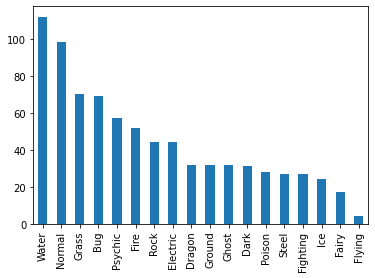

In [82]:
poke_df["Type1"].value_counts().plot.bar()

<AxesSubplot:>

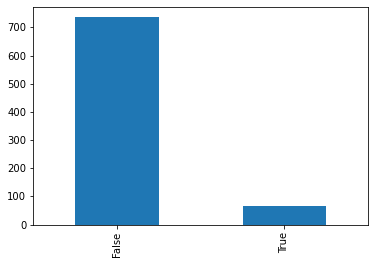

In [83]:
poke_df["Legendary"].value_counts().plot.bar()

In [84]:
#Clean the dataframe to include only relevant columns and create a recode column for each type 
poke_df["Type1_Recode"] = ""
poke_df["Type2_Recode"] = ""
poke_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,Type1_Recode,Type2_Recode
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,,
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,,
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,,
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,,
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,,
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,,
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,,
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,,


In [85]:
#Gather list of unique pokemon types
type1_list = poke_df["Type1"].unique()
type1_list

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [86]:
#Confirm number of unique types
len(type1_list)

18

In [87]:
#iterate through DF to recode the listed type1 for each pokemon 
for row,col in poke_df.iterrows(): 
    if poke_df["Type1"][row] == "Grass": 
        poke_df["Type1_Recode"][row] = 1
    elif poke_df["Type1"][row] == "Fire": 
        poke_df["Type1_Recode"][row] = 2
    elif poke_df["Type1"][row] == "Water": 
        poke_df["Type1_Recode"][row] = 3
    elif poke_df["Type1"][row] == "Bug": 
        poke_df["Type1_Recode"][row] = 4
    elif poke_df["Type1"][row] == "Normal": 
        poke_df["Type1_Recode"][row] = 5
    elif poke_df["Type1"][row] == "Poison": 
        poke_df["Type1_Recode"][row] = 6
    elif poke_df["Type1"][row] == "Electric": 
        poke_df["Type1_Recode"][row] = 7
    elif poke_df["Type1"][row] == "Ground": 
        poke_df["Type1_Recode"][row] = 8
    elif poke_df["Type1"][row] == "Fairy": 
        poke_df["Type1_Recode"][row] = 9
    elif poke_df["Type1"][row] == "Fighting": 
        poke_df["Type1_Recode"][row] = 10
    elif poke_df["Type1"][row] == "Psychic": 
        poke_df["Type1_Recode"][row] = 11
    elif poke_df["Type1"][row] == "Rock": 
        poke_df["Type1_Recode"][row] = 12
    elif poke_df["Type1"][row] == "Ghost": 
        poke_df["Type1_Recode"][row] = 13
    elif poke_df["Type1"][row] == "Ice": 
        poke_df["Type1_Recode"][row] = 14
    elif poke_df["Type1"][row] == "Dragon": 
        poke_df["Type1_Recode"][row] = 15
    elif poke_df["Type1"][row] == "Dark": 
        poke_df["Type1_Recode"][row] = 16
    elif poke_df["Type1"][row] == "Steel": 
        poke_df["Type1_Recode"][row] = 17
    elif poke_df["Type1"][row] == "Flying": 
        poke_df["Type1_Recode"][row] = 18
        
poke_df


In [51]:
#iterate through DF to recode the listed type2 for each pokemon 
for row,col in poke_df.iterrows(): 
    if poke_df["Type2"][row] == "Grass": 
        poke_df["Type2_Recode"][row] = 1
    elif poke_df["Type2"][row] == "Fire": 
        poke_df["Type2_Recode"][row] = 2
    elif poke_df["Type2"][row] == "Water": 
        poke_df["Type2_Recode"][row] = 3
    elif poke_df["Type2"][row] == "Bug": 
        poke_df["Type2_Recode"][row] = 4
    elif poke_df["Type2"][row] == "Normal": 
        poke_df["Type2_Recode"][row] = 5
    elif poke_df["Type2"][row] == "Poison": 
        poke_df["Type2_Recode"][row] = 6
    elif poke_df["Type2"][row] == "Electric": 
        poke_df["Type2_Recode"][row] = 7
    elif poke_df["Type2"][row] == "Ground": 
        poke_df["Type2_Recode"][row] = 8
    elif poke_df["Type2"][row] == "Fairy": 
        poke_df["Type2_Recode"][row] = 9
    elif poke_df["Type2"][row] == "Fighting": 
        poke_df["Type2_Recode"][row] = 10
    elif poke_df["Type2"][row] == "Psychic": 
        poke_df["Type2_Recode"][row] = 11
    elif poke_df["Type2"][row] == "Rock": 
        poke_df["Type2_Recode"][row] = 12
    elif poke_df["Type2"][row] == "Ghost": 
        poke_df["Type2_Recode"][row] = 13
    elif poke_df["Type2"][row] == "Ice": 
        poke_df["Type2_Recode"][row] = 14
    elif poke_df["Type2"][row] == "Dragon": 
        poke_df["Type2_Recode"][row] = 15
    elif poke_df["Type2"][row] == "Dark": 
        poke_df["Type2_Recode"][row] = 16
    elif poke_df["Type2"][row] == "Steel": 
        poke_df["Type2_Recode"][row] = 17
    elif poke_df["Type2"][row] == "Flying": 
        poke_df["Type2_Recode"][row] = 18
        
poke_df



C:\Users\Daniel\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Daniel\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Daniel\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Daniel\anaconda3\envs\PythonAdv\lib\site

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,Type1_Recode,Type2_Recode
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,6
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,6
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,6
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,6
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,12,9
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,12,9
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,11,13
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,11,16


In [79]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(poke_df["Type1_Recode"])
encoded_type1 = label_encoder.transform(poke_df["Type1_Recode"])

In [53]:
## For a rainy day
# # Step 2: Label-encode data set
# label_encoder.fit(short_df["Type2_Recode"])
# encoded_type2 = label_encoder.transform(short_df["Type2_Recode"])

In [54]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_type1 = to_categorical(encoded_type1)
one_hot_type1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
# 'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
#      'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
#        'Dragon', 'Dark', 'Steel', 'Flying'

In [56]:
# Create df of one hot encoding
hot_df = pd.DataFrame(one_hot_type1)
hot_df

#Merge the encoding with the pokemon dataframe
merged_df = pd.merge(poke_df,hot_df, how='outer', left_index=True, right_index=True)
merged_df

#Rename the columns
final_df = merged_df.rename(columns = {0:"Grass",
                                       1:"Fire",
                                       2:"Water",
                                       3:"Bug",
                                       4:"Normal",
                                      5:"Poison",
                                      6:"Electric",
                                      7:"Ground",
                                      8:"Fairy",
                                      9:"Fighting",
                                      10:"Psychic",
                                      11:"Rock",
                                      12:"Ghost",
                                      13:"Ice",
                                      14:"Dragon",
                                      15:"Dark",
                                      16:"Steel",
                                      17:"Flying"})
final_df



,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# #Normalize the data
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(final_df[["HP","Attack","Defense","SpAtk","SpDef", "Speed"]])
final_df[["HP","Attack","Defense","SpAtk","SpDef", "Speed"]] = transformer.transform(final_df[["HP","Attack","Defense","SpAtk","SpDef", "Speed"]])

final_df

# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()

# final_df[["HP","Attack","Defense","SpAtk","SpDef", "Speed"]] = mms.fit_transform(final_df[["HP","Attack","Defense","SpAtk","SpDef", "Speed"]])
# final_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,Bulbasaur,Grass,Poison,318,0.342109,0.372519,0.372519,0.494157,0.494157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,405,0.359772,0.371764,0.377761,0.479696,0.479696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,525,0.371339,0.380622,0.385264,0.464173,0.464173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,0.308577,0.385721,0.474437,0.470580,0.462865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,309,0.304548,0.406064,0.335784,0.468536,0.390446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,0.188982,0.377964,0.566947,0.377964,0.566947,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
796,719,DiancieMega Diancie,Rock,Fairy,700,0.166667,0.533333,0.366667,0.533333,0.366667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,0.310460,0.426883,0.232845,0.582113,0.504498,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,0.269987,0.539974,0.202490,0.573722,0.438729,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
final_df.to_csv(r'./Resources/poke_recode.csv', index = False, header=True)  

In [59]:
#Split the sample by legendary status
legendary_df = final_df[final_df["Legendary"] == True]
nonlegend_df = final_df[final_df["Legendary"] == False]

#Display the lengths of each df
print(len(legendary_df), len(nonlegend_df))

65 735


In [60]:
#Take 80% non legendary and 20% of legendary
train_legendary_df = legendary_df.sample(n=int((len(legendary_df)*.8)))
train_nonlegend_df = nonlegend_df.sample(n=int(len(nonlegend_df)*.8))

In [61]:
train_df = train_legendary_df.append(train_nonlegend_df)
train_df = train_df.sort_index()
train_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
1,2,Ivysaur,Grass,Poison,405,0.359772,0.371764,0.377761,0.479696,0.479696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,525,0.371339,0.380622,0.385264,0.464173,0.464173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,0.308577,0.385721,0.474437,0.470580,0.462865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,309,0.304548,0.406064,0.335784,0.468536,0.390446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Charmeleon,Fire,NaN,405,0.347555,0.383509,0.347555,0.479386,0.389501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,600,0.437581,0.405167,0.490252,0.328185,0.384909,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
795,719,Diancie,Rock,Fairy,600,0.188982,0.377964,0.566947,0.377964,0.566947,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
796,719,DiancieMega Diancie,Rock,Fairy,700,0.166667,0.533333,0.366667,0.533333,0.366667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,0.269987,0.539974,0.202490,0.573722,0.438729,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#Create the difference of the final and sample df
test_df = pd.concat([final_df, train_df]).loc[
    final_df.index.symmetric_difference(train_df.index)
]

test_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,Bulbasaur,Grass,Poison,318,0.342109,0.372519,0.372519,0.494157,0.494157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,9,Blastoise,Water,NaN,530,0.362614,0.380975,0.459005,0.390155,0.481956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,11,Metapod,Bug,NaN,205,0.556415,0.222566,0.612056,0.278207,0.278207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,15,BeedrillMega Beedrill,Bug,Poison,495,0.274736,0.634007,0.169069,0.063401,0.338137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,22,Fearow,Normal,Flying,442,0.352553,0.488151,0.352553,0.330858,0.330858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,706,Goodra,Dragon,NaN,600,0.355756,0.395285,0.276699,0.434813,0.592927,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
780,710,PumpkabooAverage Size,Ghost,Grass,335,0.353452,0.476078,0.504932,0.317386,0.396732,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
782,710,PumpkabooLarge Size,Ghost,Grass,335,0.389215,0.475707,0.504538,0.317138,0.396423,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
787,711,GourgeistSuper Size,Ghost,Grass,494,0.405157,0.476655,0.581520,0.276460,0.357492,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
from sklearn.preprocessing import LabelEncoder
# making a specific dataframe to predict legendary or not
stats_df = train_df[["HP","Attack","Defense","SpAtk","SpDef", "Speed"]]
poke_df= train_df.Legendary.astype(int)


# split train into an x and y
X_train=stats_df
y_train=poke_df

tstats_df = test_df[["HP","Attack","Defense","SpAtk","SpDef", "Speed"]]
tpoke_df= test_df.Legendary.astype(int)


# split train into an x and y
X_test=tstats_df
y_test=tpoke_df


In [64]:
poke_df

1      0
2      0
3      0
4      0
5      0
      ..
794    1
795    1
796    1
798    1
799    1
Name: Legendary, Length: 640, dtype: int32

In [65]:
# from sklearn.model_selection import train_test_split

In [66]:
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [67]:
# get linear regression
from sklearn.linear_model import LinearRegression

In [68]:
clf = LinearRegression()

In [69]:
# fit the data 
clf.fit(X_train,y_train)

LinearRegression()

In [70]:
# predict the model
clf.predict(X_test)

array([ 0.1329363 ,  0.09729071, -0.03814541, -0.02241938,  0.07393682,
        0.09251967,  0.13600296,  0.06628103,  0.05655052,  0.08544956,
        0.1142414 ,  0.04265703,  0.00659577,  0.03658273,  0.04398515,
       -0.0008857 ,  0.14452445,  0.12998472, -0.08148498,  0.06166071,
        0.01378153,  0.06077739,  0.04828587,  0.10627894,  0.05776976,
        0.09694852,  0.12677058,  0.10053844,  0.04680277,  0.00909493,
        0.13234696,  0.12162658,  0.11632601,  0.09303565,  0.08161324,
        0.0758959 , -0.07578495,  0.09208166,  0.12585075,  0.00703972,
        0.10266902,  0.09694852,  0.00806873,  0.10718386,  0.11331318,
        0.00712518,  0.07109565,  0.07722505, -0.15522885,  0.05055253,
        0.09334309,  0.13342959,  0.11728217,  0.04923192,  0.12219747,
        0.10473137,  0.14028874, -0.0066889 ,  0.10044255,  0.08644789,
        0.13226685, -0.02537111,  0.09375364,  0.07034166,  0.07381407,
        0.07483068,  0.1133734 ,  0.10529502,  0.09996249,  0.16

In [71]:
# check the score of the model

clf.score(X_test, y_test)

0.04621240828160689